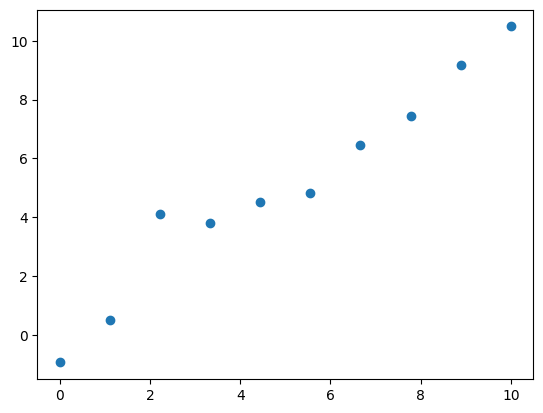

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

x = np.linspace(0,10,10)
y = x

y_randomized = []
for i,j in enumerate(x):
    y_r = round(random.uniform(y[i]+2, y[i]-2),2)
    y_randomized.append(y_r)
    

plt.scatter(x,y_randomized)

# Linear Regression

let us try to model it with a linear model:


$$ \tilde{y} = \beta_0 + \beta_1x $$

y is given as a list of data $ y \in \{y_1, y_2,....,y_N\}$ so is $x \in \{x_1, x_2,....,x_N\}$ 


so our model is:

$$ \tilde{y}_n = \beta_0 + \beta_1x_n $$

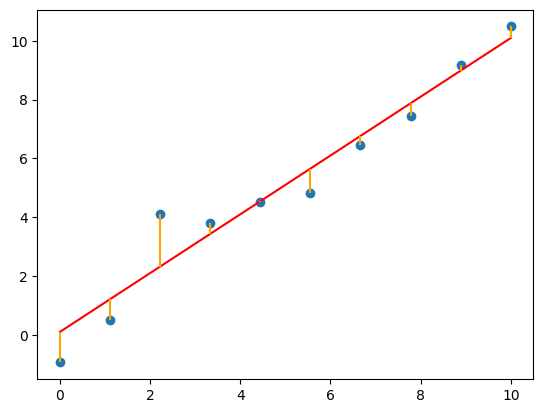

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y_randomized)

#beta1_numerator = np.sum((x - x_mean) * (y_randomized - y_mean))
#beta1_denominator = np.sum((x - x_mean) ** 2)
#beta1 = beta1_numerator / beta1_denominator

#beta0 = y_mean - beta1 * x_mean





y_tilde = x + 0.1

#y_optimzed = beta1*x + beta0

plt.scatter(x,y_randomized)
plt.plot(x,y_tilde, color = 'r')
#plt.plot(x,y_optimzed)
for i in range(len(x)):
    plt.vlines(x=x[i], ymin=y_randomized[i], ymax=y_tilde[i], colors='orange', linestyles='solid', label='Vertical Line')


interactive(children=(FloatSlider(value=1.0, description='Slope', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

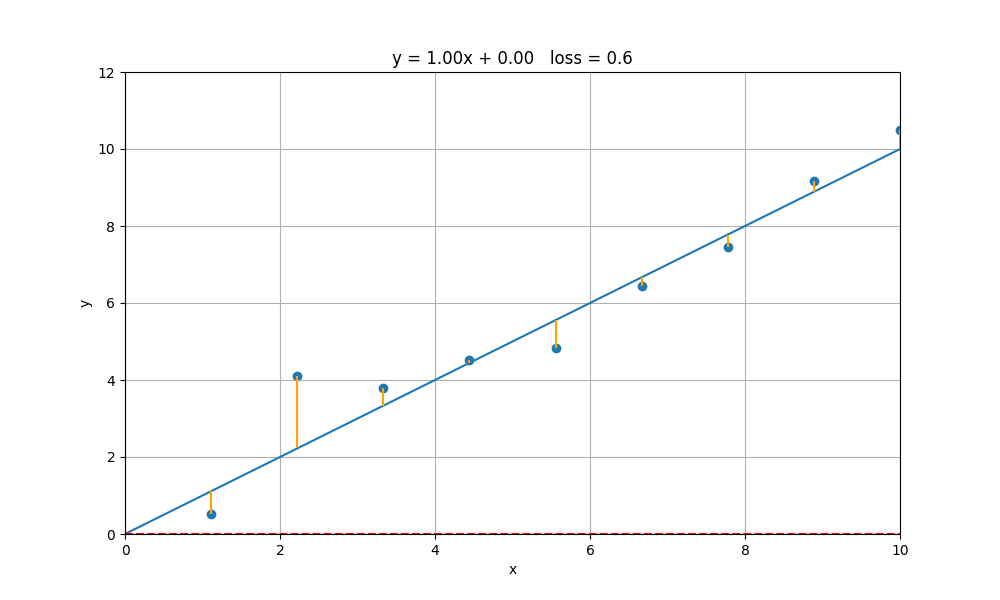

In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

# Create random data


# Initial plot setup
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [])
vert_l = np.zeros(len(x))  # Initialize vertical line bottom coordinates

# Set plot limits and other aesthetics
ax.set_xlim(0, 10)  # X-axis limit starts from 0
ax.set_ylim(0, 12)
ax.axhline(y=0, color='r', linestyle='--')
ax.axvline(x=0, color='r', linestyle='--')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x, y_randomized)
title = ax.set_title('')



# Create the vertical lines for the plot
vertical_lines = [ax.vlines(x=x[i], ymin=0, ymax=0, colors='orange', linestyles='solid') for i in range(len(x))]

# Update function for the interactive plot
def update_plot(slope, intercept):
    # Update line equation, ensuring it starts from 0 for x
    x_val = np.linspace(0, 10, len(x))  # Make x_val start from 0
    y_val = slope * x_val + intercept
    line.set_data(x_val, y_val)  # Update the line with new y values
    ssr = sum((y_val[i]-y_randomized[i])**2 for i in range(len(x)))/len(x)
    title.set_text(f'y = {slope:.2f}x + {intercept:.2f}   loss = {round(ssr,2)}')
    
    # Update vertical lines
    for i in range(len(x)):
        vertical_lines[i].set_segments([[[x[i], y_val[i]], [x[i], y_randomized[i]]]])  # Update vlines with new heights
    
    fig.canvas.draw_idle()

# Create interactive sliders for slope and intercept
interactive_plot = interactive(update_plot, 
                               slope=FloatSlider(min=-5, max=5, step=0.1, value=1, description='Slope'),
                               intercept=FloatSlider(min=-5, max=5, step=0.1, value=0, description='Intercept'))

interactive_plot


we can define a error estimate for how good is our linear model by measuring the distance between the real value and the linear model $(y_i -\tilde{y}_i)^2$. The total error or loss is then:

$$
SSR = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
$$


$$
SSR = \sum_{i=1}^{n} \left( y_i^2 - 2y_i (\beta_0 + \beta_1 x_i) + \beta_0^2 + 2\beta_0 \beta_1 x_i + \beta_1^2 x_i^2 \right)
$$


we minimze the SSR by differentiating with respect to the parameters:

$$
\frac{\partial SSR}{\partial \beta_0} = \sum_{i=1}^{n} (-2 y_i + 2 \beta_0 + 2 \beta_1 x_i)
$$

$$
0 = \sum_{i=1}^{n} (-y_i + \hat{\beta_0} + \hat{\beta_1} x_i)
$$

$$
0 = -n \bar{y} + n \hat{\beta_0} + \hat{\beta_1} n \bar{x}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

Now we differentiate with respect to $\beta_1$:

$$
\frac{\partial SSR}{\partial \beta_1} = \sum_{i=1}^{n} (-2 x_i y_i + 2 \beta_0 x_i + 2 \beta_1 x_i^2)
$$

$$
0 = -\sum_{i=1}^{n} x_i y_i + \hat{\beta_0} \sum_{i=1}^{n} x_i + \hat{\beta_1} \sum_{i=1}^{n} x_i^2
$$

$$
0 = -\sum_{i=1}^{n} x_i y_i + \left( \bar{y} - \hat{\beta_1} \bar{x} \right) \sum_{i=1}^{n} x_i + \hat{\beta_1} \sum_{i=1}^{n} x_i^2
$$

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n} x_i (y_i - \bar{y})}{\sum_{i=1}^{n} x_i (x_i - \bar{x})}
$$

This is equiavlent to:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i-\bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x}) (x_i - \bar{x})}
$$






because:
$$
\sum_{i=1}^{n}\bar{x} (y_i - \bar{y})= \bar{x}\sum_{i=1}^{n}(y_i - \bar{y})= \bar{x}(\sum_{i=1}^{n}y_i - n\bar{y})=0
$$


The optimized are parameters are:
$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i-\bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x})^2}
$$

# Mean sqaure error

$$
\textbf{MSE} = \frac{1}{m}\sum_{i=1}^{m}(y_i -\hat{y}_i)^2
$$

# Mean absolute error

$$
\textbf{MAE} = \frac{1}{m}\sum_{i=1}^{m}|y_i -\hat{y}_i|
$$

     SAT Score       GPA
406        400  1.835752
588        400  2.061096
381        403  1.773996
476        403  1.903583
814        403  1.690204


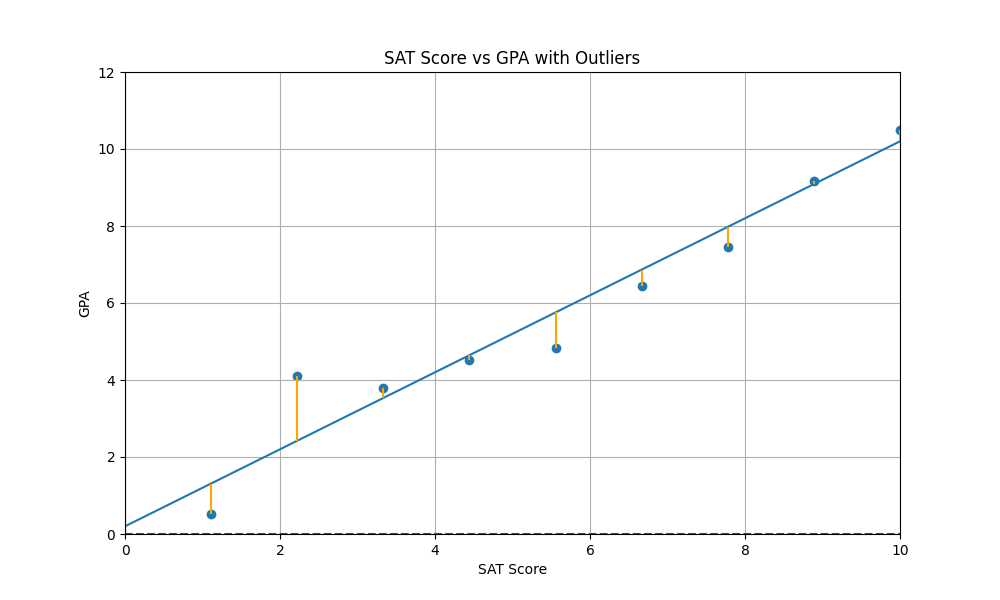

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Define the number of data points
num_points = 1000

# Step 3: Generate random SAT scores (between 400 and 1600)
np.random.seed(0)  # For reproducibility
sat_scores = np.random.randint(400, 1600, num_points)

# Step 4: Define a linear relationship between SAT scores and GPA
# Assuming GPA is between 0 and 4
gpa = 0.0015 * sat_scores + 1.1

# Step 5: Add some noise to the GPA
noise = 0.5 * np.random.normal(0, 0.5, num_points)
gpa = gpa + noise

# Step 6: Introduce outliers
num_outliers = int(0.01 * num_points)  # 1% of the data as outliers
outlier_indices = np.random.choice(num_points, num_outliers, replace=False)

# Modify GPA values at outlier indices
gpa[outlier_indices] = gpa[outlier_indices] + -0.05*np.random.normal(5, 1, num_outliers)  # Adding large values to create outliers

# Step 7: Create a DataFrame to store the data
data = pd.DataFrame({
    'SAT Score': sat_scores,
    'GPA': gpa
})

# Step 8: Save the DataFrame to a CSV file (optional)
data = data.sort_values(by=data.columns[0])

data.to_csv('sat_vs_gpa_with_outliers.csv', index=False)

# Display the first few rows of the dataset
print(data.head())

# Plot the data
plt.scatter(data['SAT Score'], data['GPA'], color='blue', marker='o')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('SAT Score vs GPA with Outliers')
plt.show()

Steps of Machine Learning modelling:

1- extract the data.
2- choose the model (Linear Regression)
3- insert the data in the model (Training)
4- Testing the model

In [9]:
import numpy as np
import pandas as pd

# Step 1: Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data['SAT Score'].values
y_train = train_data['GPA'].values
X_test = test_data['SAT Score'].values
y_test = test_data['GPA'].values

# Step 2: Fit a linear regression model to the training data
# Calculate the coefficients (slope and intercept)
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
denominator = np.sum((X_train - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean

# Step 3: Predict the target variable for the testing data
y_pred = slope * X_test + intercept

# Step 4: Calculate MAE, MSE, and RMSE manually
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

# Step 5: Print the error metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

plt.scatter(data['SAT Score'], data['GPA'])
plt.plot(data['SAT Score'], intercept + slope * data['SAT Score'], linewidth = 2,color = "red")

Mean Absolute Error (MAE): 0.19707376220249045
Mean Squared Error (MSE): 0.06099462891815168


In [10]:
train_data = data[:train_size]
row_701 = data.iloc[805]


In [11]:
row_701

SAT Score    1352.000000
GPA             3.193068
Name: 668, dtype: float64

In [12]:
y_pred = slope * row_701[0] + intercept


In [13]:
y_pred

3.137215984879057